# NOYCE Internship Paper Visual Plot Cohort 2

In [1]:
# importing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
# loacing dataset
student_data = pd.read_csv('Noyce_data_cohort2.csv', index_col=False)

In [8]:
student_data

,Student,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
0,S1,3.5,3.5,3.5,3.8,3.5,3.8,3.8,3.8,4.0,3.7,3.0,4.5
1,S2,3.8,4.0,4.0,4.5,4.3,4.8,4.8,4.0,3.5,4.0,4.3,4.3
2,S3,3.0,4.3,4.0,4.5,4.3,4.8,4.3,4.0,3.5,3.5,4.0,4.3
3,S4,4.5,4.5,4.0,4.8,4.8,4.5,4.5,4.5,4.0,4.5,3.8,4.3
4,S5,4.0,3.0,3.5,3.8,3.8,2.8,2.8,3.5,2.5,3.3,2.3,2.8
5,S6,3.8,3.8,3.8,4.0,4.3,3.8,3.5,3.5,3.3,3.3,3.3,3.3


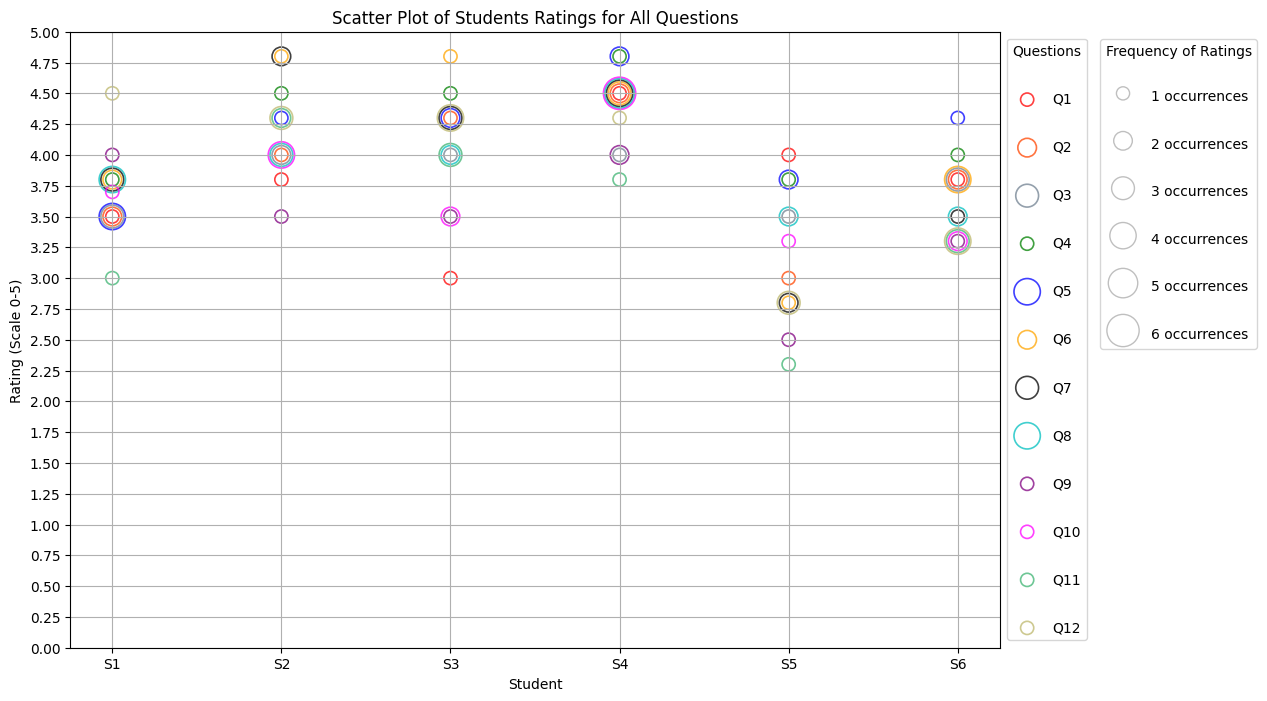

In [103]:
# Function to assign color to each question
def question_color(ques_column_name):
    # # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orangered', 'Q3': 'slategray', 'Q4': 'green', 'Q5': 'blue',
        'Q6': 'orange', 'Q7': 'black', 'Q8': 'c', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki'
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns the second arguement 'orangered' as a default color
    return color_dict.get(ques_column_name, 'orangered')

# Base size for all questions
base_size = 90

# Adjusting the plot to use the same base size for all questions but vary size by frequency of occurrence
plt.figure(figsize=(12, 8))

# Initialize a dictionary to store frequency counts for stacking sizes
frequency_dict = {} # This dictionary is used to keep track of how many times each unique combination of student and rating (key) has occurred.

# Initialize a dictionary to track if a question's label has been added to the legend
label_added = {question: False for question in student_data.columns[1:]}

# nested for loop which interates through all 12 questions then iterates through all 10 students
# for each question in the columns of student_data dataset staring from the second column until last column (Q1 --> Q12)
for question in student_data.columns[1:]: # question refers to each question in the dataset
    # for each question, iterates over each student and their index along the 'Student' column in the student_data dataset
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # enumerate(student_data['Student']) provides student and index of each element in the list
    for student_index, student in enumerate(student_data['Student']): # student is the identifeir fro each student in student_data dataset and student_index is the index of each student (index 0 --> index 9)
        # Calculate the rating for the given student for a particular question is retrieved from the dataset
        student_rating = student_data.loc[student_data['Student'] == student, question].item()
        # Vairable which creates a unique identifier for each student and their rating
        key = (student_index, student_rating)
        # checking if key (combination of student_index and student_rating) is already in frequency_dict (which it is not in)
        if key not in frequency_dict: 
            # frequency_dict[key] is the frequency count of the specific combination of student and rating.
            frequency_dict[key] = 0 # since key is not already in frequency_dict we will initialize it with a value of 0 so that when we start counting occurrences of this specific combination of student and rating, you start from zero.
        # increments the count for this key by 1 so then when the code looks at how amny times a particular rating shows up for a given student and increases the count by 1 per occurance
        frequency_dict[key] += 1 
        # Calculates the size based on frequency of a rating for a given student for a given question
        size = base_size * frequency_dict[key] 

        # Add label only once per question
        label = question if not label_added[question] else ""
        label_added[question] = True

        # Creating a scatter plot which will plot multiple times per iteration
        # [student_index] is wrapped in a list to ensure that plt.scatter() gets a sequence (even if it’s just one value). This tells Matplotlib where to place the point along the x-axis
        # [student_rating] is wrapped in a list to ensure that plt.scatter() receives a sequence. This tells Matplotlib where to place the point along the y-axis.
        # marker='o' sets the shape of the datapoints in the scatterplot to a circular o shape
        plt.scatter([student_index], [student_rating], s=size, facecolors='none', edgecolors=question_color(question), alpha=0.75, linewidth=1.20, label=label, marker='o')

# Create and adjust legends and labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend1 = plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, labelspacing=2.45, title="Questions")
plt.gca().add_artist(legend1)  # Re-add the first legend

handles_sizes = [plt.scatter([], [], s=base_size*(i+1), facecolors='none', edgecolors='gray', alpha=0.5) for i in range(6)]
labels_sizes = [f'{i+1} occurrences' for i in range(6)]
legend2 = plt.legend(handles_sizes, labels_sizes, title="Frequency of Ratings", loc='lower left', fontsize=10, handletextpad=1, labelspacing=2, handleheight=1.8, bbox_to_anchor=(1.10, 0.474))

# Setting the x-axis and y-axis
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

# Setting the title
plt.title('Scatter Plot of Students Ratings for All Questions')

# Setting major ticks for y-axis and x-axis
plt.yticks(np.arange(0, 5.25, 0.25))
plt.xticks(ticks=np.arange(len(student_data['Student'])), labels=student_data['Student'])

# Setting a grid for the plot
plt.grid(True)

plt.show()

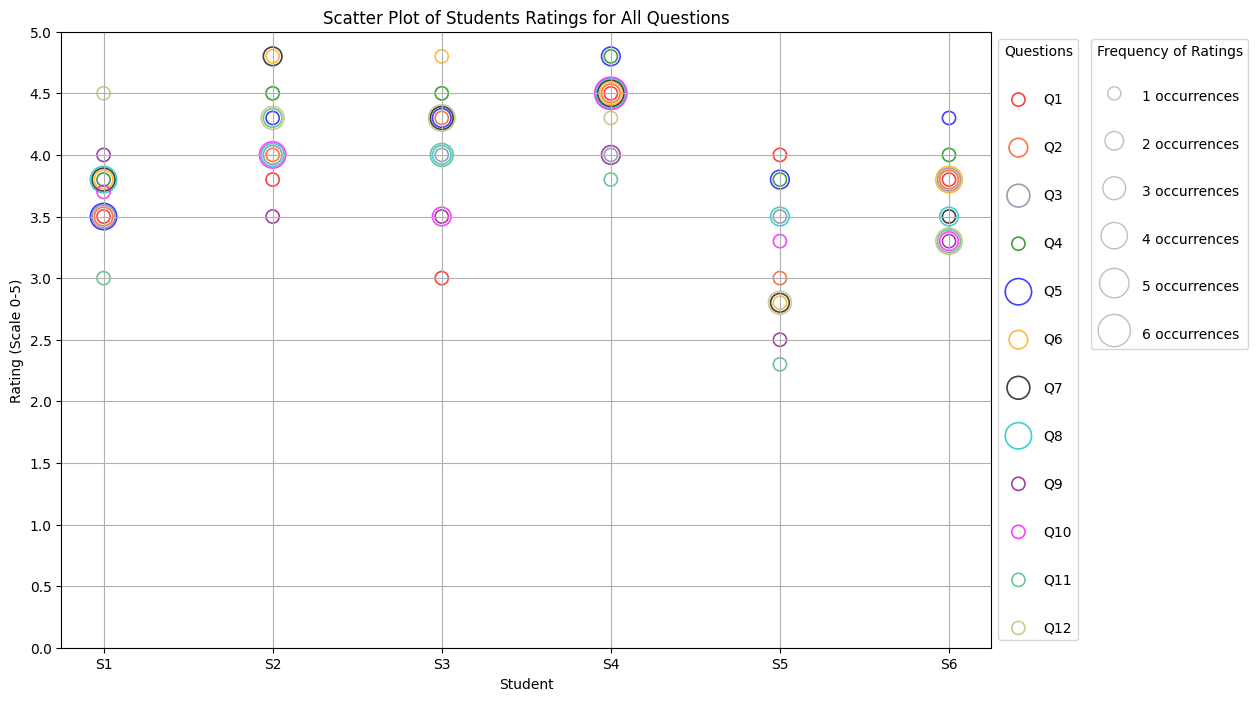

In [102]:
# Function to assign color to each question
def question_color(ques_column_name):
    # # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orangered', 'Q3': 'slategray', 'Q4': 'green', 'Q5': 'blue',
        'Q6': 'orange', 'Q7': 'black', 'Q8': 'c', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki'
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns the second arguement 'orangered' as a default color
    return color_dict.get(ques_column_name, 'orangered')

# Base size for all questions
base_size = 90

# Adjusting the plot to use the same base size for all questions but vary size by frequency of occurrence
plt.figure(figsize=(12, 8))

# Initialize a dictionary to store frequency counts for stacking sizes
frequency_dict = {} # This dictionary is used to keep track of how many times each unique combination of student and rating (key) has occurred.

# Initialize a dictionary to track if a question's label has been added to the legend
label_added = {question: False for question in student_data.columns[1:]}

# nested for loop which interates through all 12 questions then iterates through all 10 students
# for each question in the columns of student_data dataset staring from the second column until last column (Q1 --> Q12)
for question in student_data.columns[1:]: # question refers to each question in the dataset
    # for each question, iterates over each student and their index along the 'Student' column in the student_data dataset
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # enumerate(student_data['Student']) provides student and index of each element in the list
    for student_index, student in enumerate(student_data['Student']): # student is the identifeir fro each student in student_data dataset and student_index is the index of each student (index 0 --> index 9)
        # Calculate the rating for the given student for a particular question is retrieved from the dataset
        student_rating = student_data.loc[student_data['Student'] == student, question].item()
        # Vairable which creates a unique identifier for each student and their rating
        key = (student_index, student_rating)
        # checking if key (combination of student_index and student_rating) is already in frequency_dict (which it is not in)
        if key not in frequency_dict: 
            # frequency_dict[key] is the frequency count of the specific combination of student and rating.
            frequency_dict[key] = 0 # since key is not already in frequency_dict we will initialize it with a value of 0 so that when we start counting occurrences of this specific combination of student and rating, you start from zero.
        # increments the count for this key by 1 so then when the code looks at how amny times a particular rating shows up for a given student and increases the count by 1 per occurance
        frequency_dict[key] += 1 
        # Calculates the size based on frequency of a rating for a given student for a given question
        size = base_size * frequency_dict[key] 

        # Add label only once per question
        label = question if not label_added[question] else ""
        label_added[question] = True

        # Creating a scatter plot which will plot multiple times per iteration
        # [student_index] is wrapped in a list to ensure that plt.scatter() gets a sequence (even if it’s just one value). This tells Matplotlib where to place the point along the x-axis
        # [student_rating] is wrapped in a list to ensure that plt.scatter() receives a sequence. This tells Matplotlib where to place the point along the y-axis.
        # marker='o' sets the shape of the datapoints in the scatterplot to a circular o shape
        plt.scatter([student_index], [student_rating], s=size, facecolors='none', edgecolors=question_color(question), alpha=0.75, linewidth=1.20, label=label, marker='o')

# Create and adjust legends and labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend1 = plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, labelspacing=2.45, title="Questions")
plt.gca().add_artist(legend1)  # Re-add the first legend

handles_sizes = [plt.scatter([], [], s=base_size*(i+1), facecolors='none', edgecolors='gray', alpha=0.5) for i in range(6)]
labels_sizes = [f'{i+1} occurrences' for i in range(6)]
legend2 = plt.legend(handles_sizes, labels_sizes, title="Frequency of Ratings", loc='lower left', fontsize=10, handletextpad=1, labelspacing=2, handleheight=1.8, bbox_to_anchor=(1.10, 0.474))

# Setting the x-axis and y-axis
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

# Setting the title
plt.title('Scatter Plot of Students Ratings for All Questions')

# Setting major ticks for y-axis and x-axis
plt.yticks(np.arange(0, 5.5, 0.5))
plt.xticks(ticks=np.arange(len(student_data['Student'])), labels=student_data['Student'])

# Setting a grid for the plot
plt.grid(True)

plt.show()

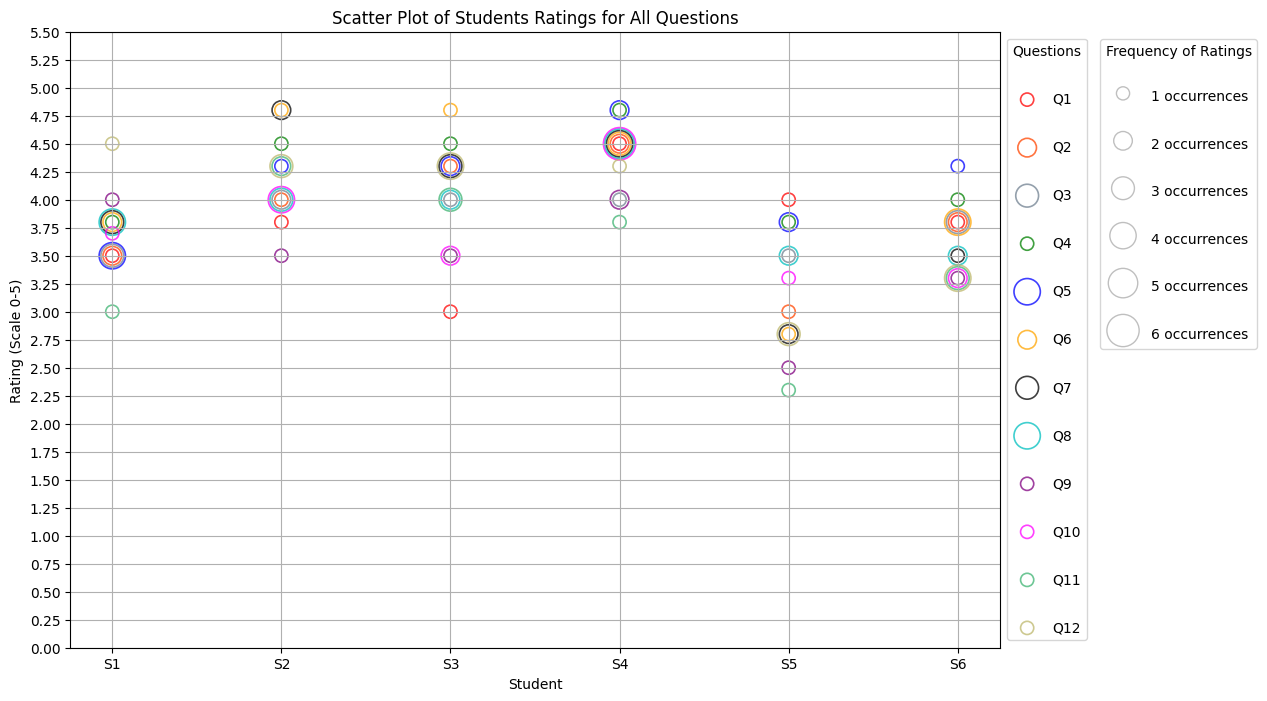

In [101]:
# Function to assign color to each question
def question_color(ques_column_name):
    # # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orangered', 'Q3': 'slategray', 'Q4': 'green', 'Q5': 'blue',
        'Q6': 'orange', 'Q7': 'black', 'Q8': 'c', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki'
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns the second arguement 'orangered' as a default color
    return color_dict.get(ques_column_name, 'orangered')

# Base size for all questions
base_size = 90

# Adjusting the plot to use the same base size for all questions but vary size by frequency of occurrence
plt.figure(figsize=(12, 8))

# Initialize a dictionary to store frequency counts for stacking sizes
frequency_dict = {} # This dictionary is used to keep track of how many times each unique combination of student and rating (key) has occurred.

# Initialize a dictionary to track if a question's label has been added to the legend
label_added = {question: False for question in student_data.columns[1:]}

# nested for loop which interates through all 12 questions then iterates through all 10 students
# for each question in the columns of student_data dataset staring from the second column until last column (Q1 --> Q12)
for question in student_data.columns[1:]: # question refers to each question in the dataset
    # for each question, iterates over each student and their index along the 'Student' column in the student_data dataset
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # enumerate(student_data['Student']) provides student and index of each element in the list
    for student_index, student in enumerate(student_data['Student']): # student is the identifeir fro each student in student_data dataset and student_index is the index of each student (index 0 --> index 9)
        # Calculate the rating for the given student for a particular question is retrieved from the dataset
        student_rating = student_data.loc[student_data['Student'] == student, question].item()
        # Vairable which creates a unique identifier for each student and their rating
        key = (student_index, student_rating)
        # checking if key (combination of student_index and student_rating) is already in frequency_dict (which it is not in)
        if key not in frequency_dict: 
            # frequency_dict[key] is the frequency count of the specific combination of student and rating.
            frequency_dict[key] = 0 # since key is not already in frequency_dict we will initialize it with a value of 0 so that when we start counting occurrences of this specific combination of student and rating, you start from zero.
        # increments the count for this key by 1 so then when the code looks at how amny times a particular rating shows up for a given student and increases the count by 1 per occurance
        frequency_dict[key] += 1 
        # Calculates the size based on frequency of a rating for a given student for a given question
        size = base_size * frequency_dict[key] 

        # Add label only once per question
        label = question if not label_added[question] else ""
        label_added[question] = True

        # Creating a scatter plot which will plot multiple times per iteration
        # [student_index] is wrapped in a list to ensure that plt.scatter() gets a sequence (even if it’s just one value). This tells Matplotlib where to place the point along the x-axis
        # [student_rating] is wrapped in a list to ensure that plt.scatter() receives a sequence. This tells Matplotlib where to place the point along the y-axis.
        # marker='o' sets the shape of the datapoints in the scatterplot to a circular o shape
        plt.scatter([student_index], [student_rating], s=size, facecolors='none', edgecolors=question_color(question), alpha=0.75, linewidth=1.20, label=label, marker='o')

# Create and adjust legends and labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend1 = plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, labelspacing=2.45, title="Questions")
plt.gca().add_artist(legend1)  # Re-add the first legend

handles_sizes = [plt.scatter([], [], s=base_size*(i+1), facecolors='none', edgecolors='gray', alpha=0.5) for i in range(6)]
labels_sizes = [f'{i+1} occurrences' for i in range(6)]
legend2 = plt.legend(handles_sizes, labels_sizes, title="Frequency of Ratings", loc='lower left', fontsize=10, handletextpad=1, labelspacing=2, handleheight=1.8, bbox_to_anchor=(1.10, 0.474))

# Setting the x-axis and y-axis
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

# Setting the title
plt.title('Scatter Plot of Students Ratings for All Questions')

# Setting major ticks for y-axis and x-axis
plt.yticks(np.arange(0, 5.75, 0.25))
plt.xticks(ticks=np.arange(len(student_data['Student'])), labels=student_data['Student'])

# Setting a grid for the plot
plt.grid(True)

plt.show()

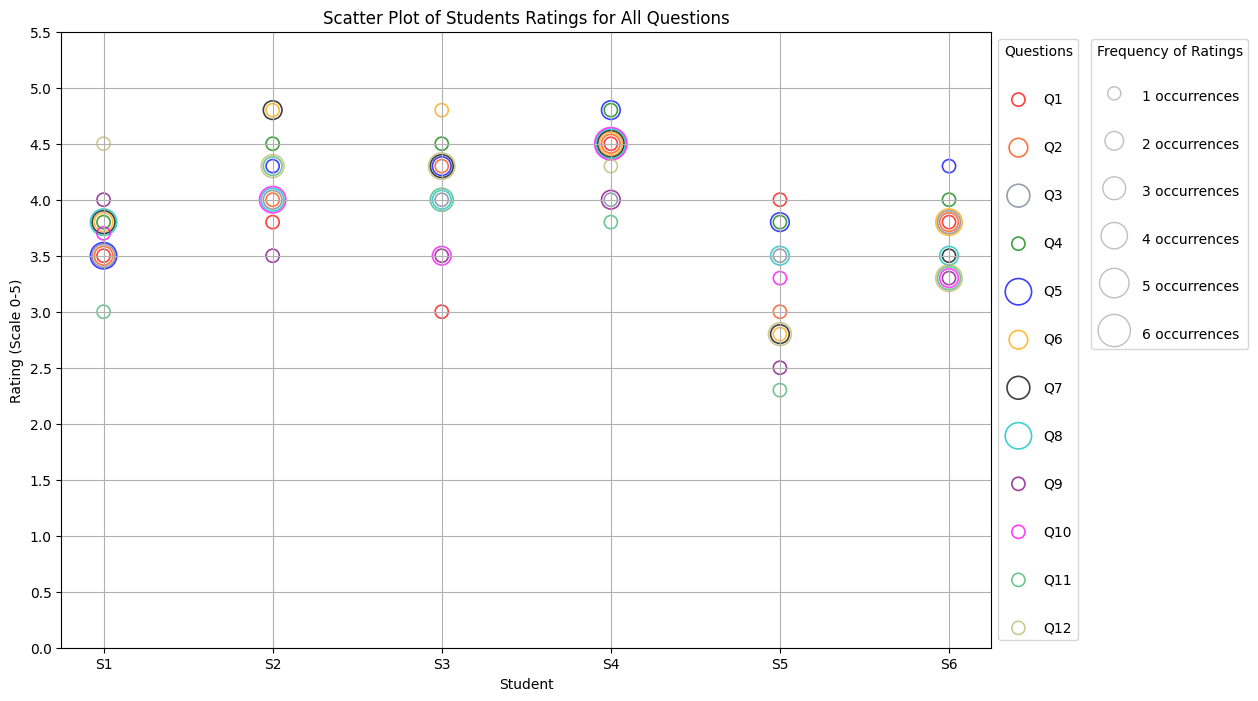

In [100]:
# Function to assign color to each question
def question_color(ques_column_name):
    # # dictionary that assigns a color for a specific question
    color_dict = {
        'Q1': 'red', 'Q2': 'orangered', 'Q3': 'slategray', 'Q4': 'green', 'Q5': 'blue',
        'Q6': 'orange', 'Q7': 'black', 'Q8': 'c', 'Q9': 'purple', 'Q10': 'magenta',
        'Q11': 'mediumseagreen', 'Q12': 'darkkhaki'
    }
    # returns the color associated with a given question
    # If the ques_column_name exists in color_dict, it returns the corresponding color, if it does not exist then returns the second arguement 'orangered' as a default color
    return color_dict.get(ques_column_name, 'orangered')

# Base size for all questions
base_size = 90

# Adjusting the plot to use the same base size for all questions but vary size by frequency of occurrence
plt.figure(figsize=(12, 8))

# Initialize a dictionary to store frequency counts for stacking sizes
frequency_dict = {} # This dictionary is used to keep track of how many times each unique combination of student and rating (key) has occurred.

# Initialize a dictionary to track if a question's label has been added to the legend
label_added = {question: False for question in student_data.columns[1:]}

# nested for loop which interates through all 12 questions then iterates through all 10 students
# for each question in the columns of student_data dataset staring from the second column until last column (Q1 --> Q12)
for question in student_data.columns[1:]: # question refers to each question in the dataset
    # for each question, iterates over each student and their index along the 'Student' column in the student_data dataset
    # student_data['Student'] retrieves the 'Student' column from the student_data dataset. This column contains the identifiers for each student
    # enumerate(student_data['Student']) provides student and index of each element in the list
    for student_index, student in enumerate(student_data['Student']): # student is the identifeir fro each student in student_data dataset and student_index is the index of each student (index 0 --> index 9)
        # Calculate the rating for the given student for a particular question is retrieved from the dataset
        student_rating = student_data.loc[student_data['Student'] == student, question].item()
        # Vairable which creates a unique identifier for each student and their rating
        key = (student_index, student_rating)
        # checking if key (combination of student_index and student_rating) is already in frequency_dict (which it is not in)
        if key not in frequency_dict: 
            # frequency_dict[key] is the frequency count of the specific combination of student and rating.
            frequency_dict[key] = 0 # since key is not already in frequency_dict we will initialize it with a value of 0 so that when we start counting occurrences of this specific combination of student and rating, you start from zero.
        # increments the count for this key by 1 so then when the code looks at how amny times a particular rating shows up for a given student and increases the count by 1 per occurance
        frequency_dict[key] += 1 
        # Calculates the size based on frequency of a rating for a given student for a given question
        size = base_size * frequency_dict[key] 

        # Add label only once per question
        label = question if not label_added[question] else ""
        label_added[question] = True

        # Creating a scatter plot which will plot multiple times per iteration
        # [student_index] is wrapped in a list to ensure that plt.scatter() gets a sequence (even if it’s just one value). This tells Matplotlib where to place the point along the x-axis
        # [student_rating] is wrapped in a list to ensure that plt.scatter() receives a sequence. This tells Matplotlib where to place the point along the y-axis.
        # marker='o' sets the shape of the datapoints in the scatterplot to a circular o shape
        plt.scatter([student_index], [student_rating], s=size, facecolors='none', edgecolors=question_color(question), alpha=0.75, linewidth=1.20, label=label, marker='o')

# Create and adjust legends and labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
legend1 = plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), fontsize=10, labelspacing=2.45, title="Questions")
plt.gca().add_artist(legend1)  # Re-add the first legend

handles_sizes = [plt.scatter([], [], s=base_size*(i+1), facecolors='none', edgecolors='gray', alpha=0.5) for i in range(6)]
labels_sizes = [f'{i+1} occurrences' for i in range(6)]
legend2 = plt.legend(handles_sizes, labels_sizes, title="Frequency of Ratings", loc='lower left', fontsize=10, handletextpad=1, labelspacing=2, handleheight=1.8, bbox_to_anchor=(1.10, 0.474))

# Setting the x-axis and y-axis
plt.xlabel('Student')
plt.ylabel('Rating (Scale 0-5)')

# Setting the title
plt.title('Scatter Plot of Students Ratings for All Questions')

# Setting major ticks for y-axis and x-axis
plt.yticks(np.arange(0, 6, 0.5))
plt.xticks(ticks=np.arange(len(student_data['Student'])), labels=student_data['Student'])

# Setting a grid for the plot
plt.grid(True)

plt.show()